<a href="https://colab.research.google.com/github/Aynahd/Y24/blob/main/ASSIGNMENT_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECT DETECTION WITH R-CNN USING AIRPLANES DATASET**

Question 1 - Dataset Exploration

Downloaded aiplane jpegs and corresponding bounding box annotation csv files from Kaggle and loaded to Google Colab directory.

In [3]:

# code to load files from local directory to colab

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F985493%2F1664328%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T080517Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3c38936e82cb1a3415c61a52d0a5cce5700e615e186baed52360bd73dd25c692a96ad61164d8918e92dd7c71f5d7d3136743baf343354c4923925a5c90b52938f743f60644c3cc60e4aa2d2949e7c9f49c26df47e0ec2bcfee12e459993472a71c3990473562e88bcff0cdbe446febf785e8913a8079395e03ce6e052f797b59ff70fe942e22acbdeb0bd5b6335a746e3ea1f56b72d82f0dcc3305ba595d1aa50052af12adbd91c63e0983a871bf0440096445b234bab1ae19d66bcdbc3d50e2420c86daa416b97271c5671f5770eeba78006108606d343799081da80203a6fc048300c092c3db65e7ad78f7d22794de4c7c66bd03b83c88ff972503a41332fb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12895593 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


In [4]:
#Loading all necessary libraries
#for preprocessing and analyzing data
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # for plotting
import numpy as np # for linear algebra
import os # for accessing directory structure
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow_datasets as tfds
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from tqdm import tqdm
import time
import random
#for building the NN model
import tensorflow as tf
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.callbacks import ModelCheckpoint, EarlyStopping



In [5]:
#displays filenames jpeg and csv
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/Images/Images/airplane_559.jpg
/kaggle/input/Images/Images/airplane_240.jpg
/kaggle/input/Images/Images/airplane_379.jpg
/kaggle/input/Images/Images/airplane_143.jpg
/kaggle/input/Images/Images/airplane_063.jpg
/kaggle/input/Images/Images/airplane_123.jpg
/kaggle/input/Images/Images/airplane_205.jpg
/kaggle/input/Images/Images/airplane_273.jpg
/kaggle/input/Images/Images/airplane_491.jpg
/kaggle/input/Images/Images/airplane_040.jpg
/kaggle/input/Images/Images/airplane_213.jpg
/kaggle/input/Images/Images/airplane_419.jpg
/kaggle/input/Images/Images/airplane_568.jpg
/kaggle/input/Images/Images/42850.jpg
/kaggle/input/Images/Images/airplane_542.jpg
/kaggle/input/Images/Images/airplane_004.jpg
/kaggle/input/Images/Images/airplane_079.jpg
/kaggle/input/Images/Images/airplane_393.jpg
/kaggle/input/Images/Images/airplane_374.jpg
/kaggle/input/Images/Images/airplane_195.jpg
/kaggle/input/Images/Images/airplane_670.jpg
/kaggle/input/Images/Images/airplane_471.jpg
/kaggle/input/Ima

Dataset exploration- using plotting libraries to see bounding box co ordinates vs numbers.

In [6]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * int(nGraphRow)), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [7]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 42849.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df= pd.read_csv('/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/42849.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = '42849.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 6 rows and 1 columns


In [8]:
df.head(5)

,6
0,149 110 187 149
1,186 189 202 209
2,68 61 94 94
3,115 75 149 111
4,193 138 230 175


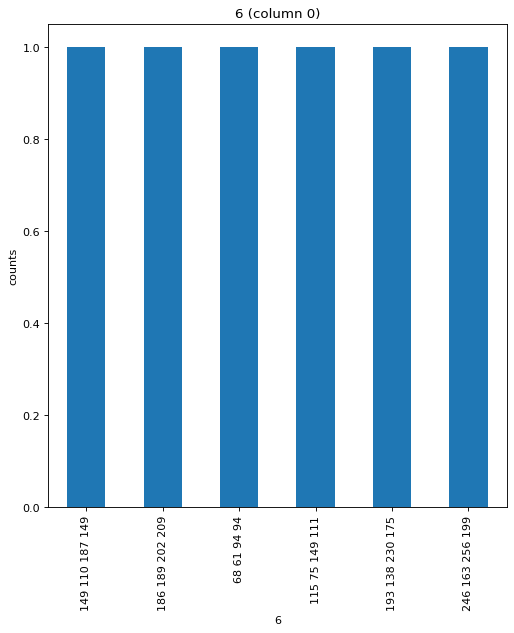

In [9]:
plotPerColumnDistribution(df, 10, 5)

In [10]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 42849.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df= pd.read_csv('/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/42845.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = '42845.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4 rows and 1 columns


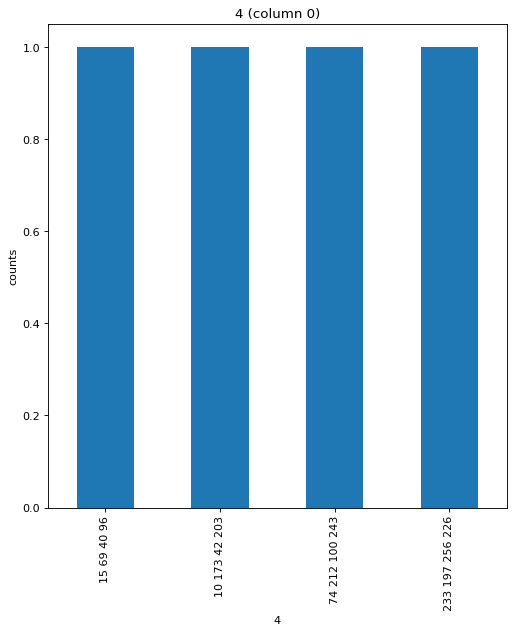

In [11]:
plotPerColumnDistribution(df, 10, 5)

In [12]:
bb_area = []
bb_area = (bb['x2'] - bb['x1']) * (bb['y2'] - bb['y1'])
bb_area.append(bb_area)

NameError: name 'bb' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = bb_area
sns.histplot(x=bb_area, data=count, kde=True, hue='area')

plt.show()

In [6]:
import pandas as pd


# reading the database
data = pd.read_csv("/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_004.csv")

# printing the top 10 rows
display(data.head(10))

,4
0,59 9 111 55
1,112 38 159 88
2,142 75 199 124
3,206 105 256 157


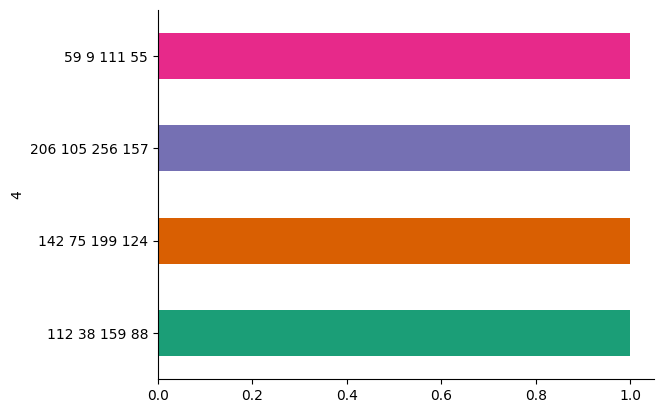

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

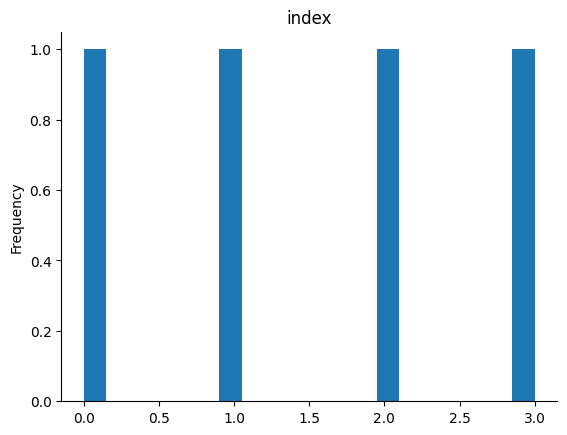

In [17]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-16-448ce5dfa42c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_4, x='index', y='4', inner='stick', palette='Dark2')


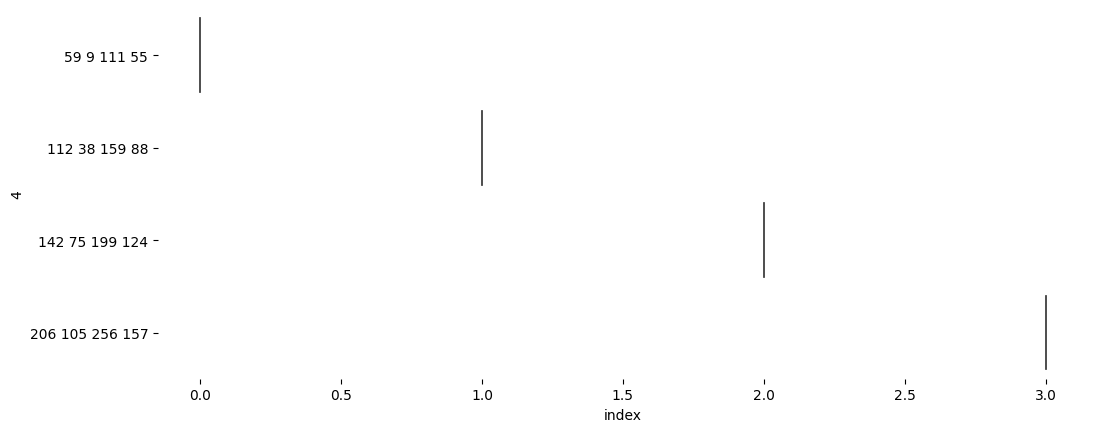

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['4'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='index', y='4', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

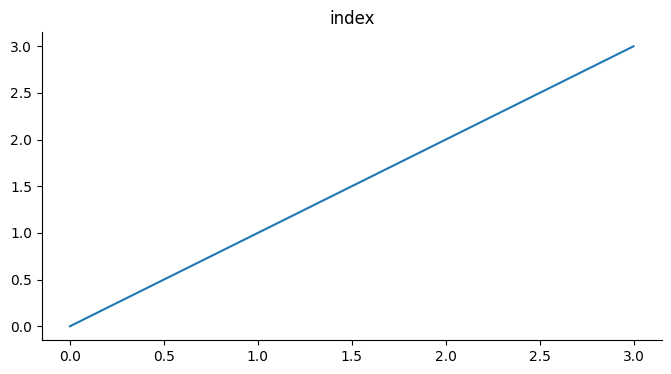

In [14]:
from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

**Question 2** - Data Augmentation Techniques and region proposals

We increase data points from existing data set by making minor changes like random flipping, resizing, rotating, cropping, brightness/ contrast etc (incase of images). Here we use geometric data augmentation techniques.
Data augmentation is normally applied only to the training data for the purpose of creating a more robust and generalized model.
Resource studied - https://www.datacamp.com/tutorial/complete-guide-data-augmentation

First we read annotations from csv files and convert bounding boxes coordinates to a list of dictionaries, each with keys x1, y1, x2, y2.

In [18]:
def get_rectangle(csv_annot):
    df = pd.read_csv(csv_annot)
    boxes=[]
    for row in df.iterrows():
        x1 = int(row[1][0].split(" ")[0])
        y1 = int(row[1][0].split(" ")[1])
        x2 = int(row[1][0].split(" ")[2])
        y2 = int(row[1][0].split(" ")[3])
        box={"x1":x1,"x2":x2,"y1":y1,"y2":y2}
        boxes.append(box)
    return boxes

Extracting rectangular bound portions from data. Ensures input img is uniform.
Resource studied - https://muhammaddawoodaslam.medium.com/image-processing-with-python-and-opencv-7f3db963b50a

In [19]:
def rectang_from_image(image,x,y,w,h):
    timage = image[y:y+h,x:x+w]
    resized = cv2.resize(timage,
                     (224,224),
                     interpolation = cv2.INTER_AREA)
    return resized

Intersection over Union / Jaccard index = area of overlapping bounding boxes/ area covered by the same two bounding boxes. Measures degree of overlap between ground truth and predicted bounding box.
https://learnopencv.com/intersection-over-union-iou-in-object-detection-and-segmentation/


In [20]:
def get_iou(bb1, bb2):
    #checks correctness of coordinates
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    # calculates intersecting area

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    #ensure IOU is [0,1]
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

Selective search algorithm is a region proposal algorithm used in object detection to generate possible bounding boxes that might contain objects.
Generates sub segments of image that could belong to a class based on color/ texture/ size/ shape (iteratively combines similar regions)


In [ ]:
max_proposal = 2000 #maximum number of region proposals to consider for further processing
max_samples = 30  #number of sample images
IOU_treshold_plane = 0.7 #requires a 70% overlap for a prediction to be considered correct for airplane class
IOU_treshold_background = 0.3 #background is less critical to detection accuracy

dataset_path = "../input/airplanes-dataset-for-rcnn/Images/Images"
annot="../input/airplanes-dataset-for-rcnn/Airplanes_Annotations/Airplanes_Annotations"
#initialize an object for performing selective search on the images.
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
# initialize empty lists to store training samples
train_images=[]
train_labels=[]
images=os.listdir(dataset_path)

Region proposal

faster Selective search algorithm trades quality of proposal vs speed
https://www.geeksforgeeks.org/opencv-selective-search-for-object-detection/

In [ ]:
img_name=random.choice(images)
img = cv2.imread(os.path.join(dataset_path,img_name))
plt.imshow(img_rgb)
csv_file = os.path.join(annot,str(img_name).split(".")[0]+".csv")
#constructs the file path for a CSV file corresponding to the image's annotations by replacing the image's extension with `.csv`.
boxes=get_rectangle(csv_file) #user defined function
for box in boxes:
    cv2.rectangle(img,(box['x1'],box['y1']),(box['x2'],box['y2']),(255,0,0), 2)#draws the box
plt.figure()
plt.imshow(img)

cv2.setUseOptimized(True);#enables the optimized code if available, potentially speeding up operations
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()#selective search
ss.setBaseImage(img)#sets image for ss algorithm to run
ss.switchToSelectiveSearchFast()#faster version of algorithm
rects = ss.process() #returns a list of proposed regions (x,y,w,h) tuple
imOut = img.copy() #original image
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA) #draws out proposed regions
plt.figure()
plt.imshow(imOut)

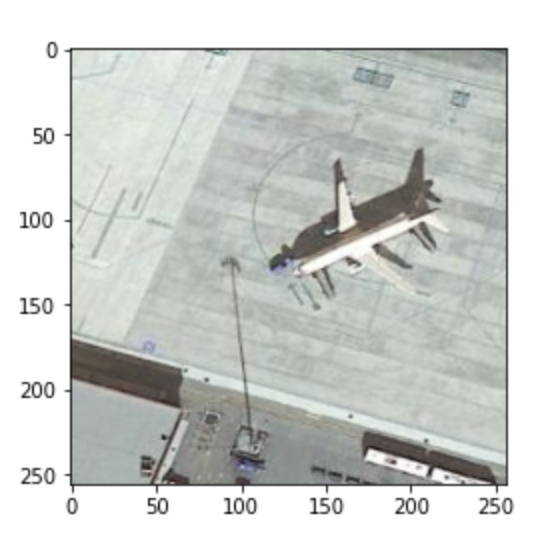

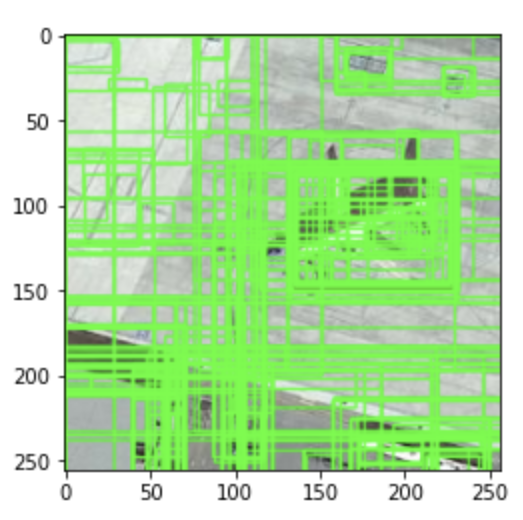

Region proposal

In [ ]:
for file in tqdm(images[:100], desc="creating dataset"):# tqdm adds progress bar in output to check dataset progress
    try:
        box_values=[]
        image=cv2.imread(os.path.join(dataset_path,file))
        csv_path = os.path.join(annot,file.split(".")[0]+".csv")
        box_values.extend(get_rectangle(csv_path))#list of bounding box
        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()#regions of selctive search
        imout = image.copy()
        counter=flag=falsecounter=fflag=bflag = 0#to check max number of samples, and keep count of +ve and -ve samples
        for e, result in  enumerate(ssresults):
            if e< max_proposal and flag==0:
                for a_box in box_values:
                    x,y,w,h = result# assigns ss proposal
                    iou = get_iou(a_box,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})# calculates iou
                    if counter < max_samples:
                        if iou > IOU_treshold_plane:
                            train_images.append(rectang_from_image(image,x,y,w,h))#positive sample
                            train_labels.append(1)
                            counter +=1
                    else:
                        fflag = 1
                    if falsecounter < max_samples:
                        if iou < IOU_treshold_background:
                            train_images.append(rectang_from_image(image,x,y,w,h))#negative sample
                            train_labels.append(0)
                            falsecounter += 1
                    else:
                        bflag = 1
                if fflag == 1 and bflag==1:
                    flag=1
    except Exception as e:
        print(e)#print exception and continue
        continue

In [ ]:
#Data Augmentation
X_new = np.array(train_images)#conversion to numpy arrays
y_new = np.array(train_labels)

X_train, X_test , y_train, y_test = train_test_split(X_new,y_new,test_size=0.10)#split dataset to train and test

trdata    = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=45)#random flip
traindata = trdata.flow(x=X_train, y=y_train)#flow method takes numpy array images and labels and returns an iterator that yields batches of images and labels for training
#tsdata    = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=0)
#testdata  = tsdata.flow(x=X_test, y=y_test)

Question 3 - RCNN model
Region based CNN

Transfer learning - evaluated ResNET (residual network) and VGG(virtual geometry group) models. Using pretrained model on newer problems. Also solves vanishing gradient problem with VGG.
Resource - https://towardsdatascience.com/vggnet-vs-resnet-924e9573ca5c

Binary classification categorizes data to two classes, here airplane/background

In [ ]:
vggmodel = VGG16(weights='imagenet', include_top=True)#VGG/ResNET have been developed with imagenet dataset, we use weights from the same

for layers in (vggmodel.layers)[:13]:#first few layers of imagenet are preserved
    print(layers)
    layers.trainable = False

X= vggmodel.layers[-2].output#modifies VGG for a binary classification task
#output obtained from last second layer
predictions = Dense(1, activation="sigmoid")(X)#adds single output unit
#sigmoid activaton function supports binary classification
model_final = Model(vggmodel.input,predictions)
opt = Adam(lr=0.0001)   #hyperparameters selection
model_final.compile(loss = keras.losses.binary_crossentropy, optimizer = opt, metrics=["accuracy"])
model_final.summary()#output summarizes the model built

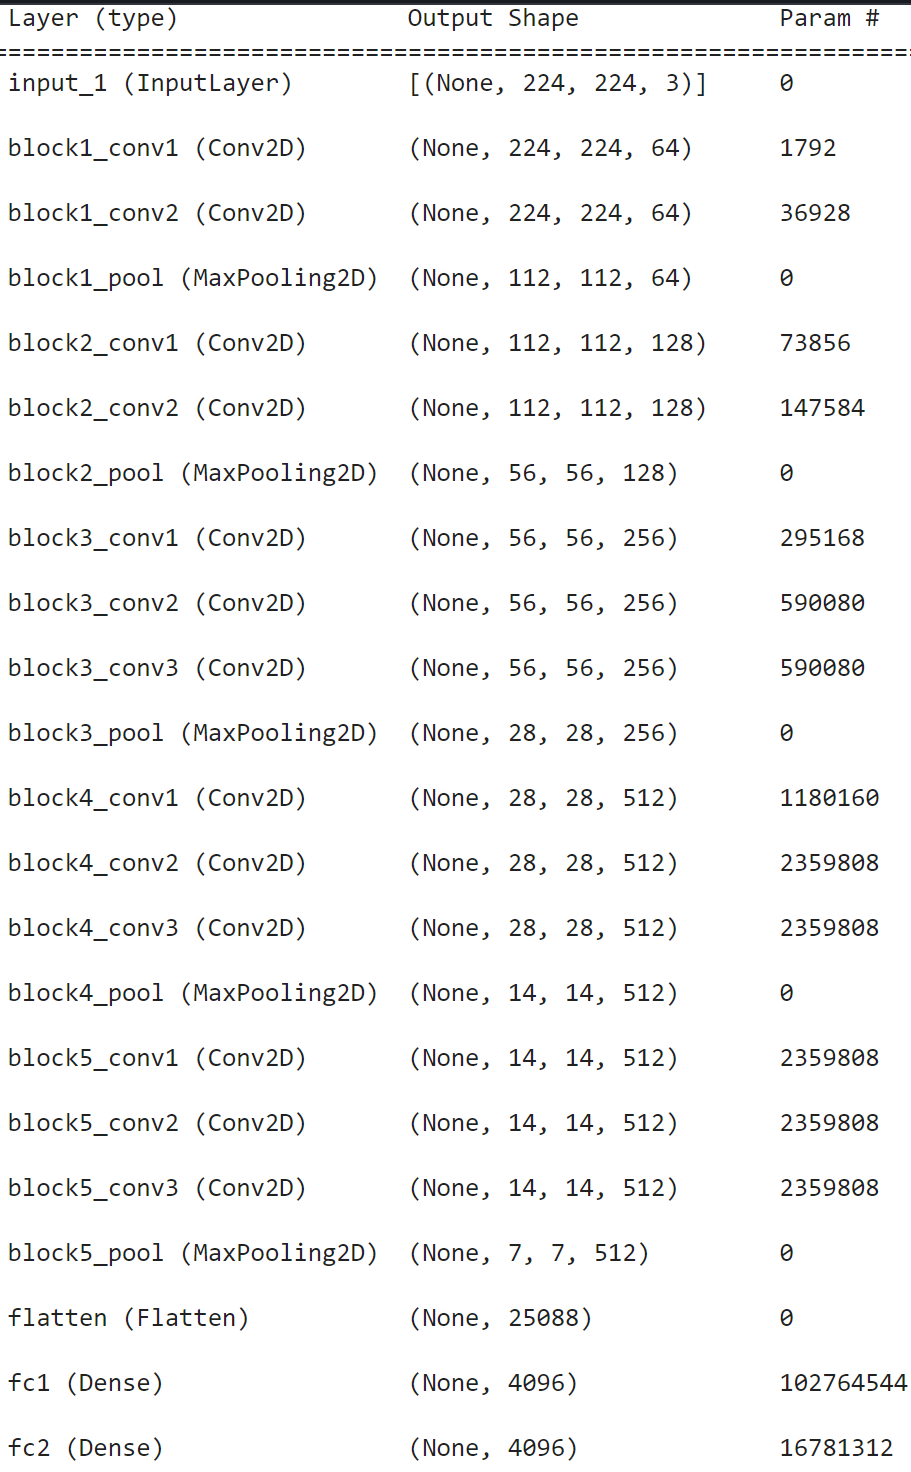

**Question - 4** Fitting to Model and Evaluation

Call backs - tools to increase efficiency. For example saving weights or stopping training if improvement is not seen after a few epochs, prevents overfitting.

Progress is monitored with a chosen metric and patience number

In [ ]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5",    #saves model at regular intervals-HDF5 file format
                             monitor='val_loss',       #validaton_loss-
                             verbose=1,                #prints message
                             save_best_only=True,      #will not overwrite better models
                             save_weights_only=False,  #full model is saved
                             mode='auto', period=1)    #model is saved based on metric chosen, saves model at end of every epoch

early = EarlyStopping(monitor='val_loss', #stops training when metric stops improving
                      min_delta=0,        #minimum change required to classify as improvement
                      patience=100,       #number of epochs with no improvement after which training will be stopped
                      verbose=1,
                      mode='auto')
#to train model on dataset--
hist = model_final.fit_generator(generator= traindata,
                                 steps_per_epoch= 10, #batches of samples
                                 epochs= 100,
                                 validation_data= testdata,
                                 validation_steps=2, #batches of samples of validation data
                                 callbacks=[checkpoint,early])

In [ ]:
#selective search for object localizaton and fit to pre trained model
img=random.choice(images)
img = cv2.imread(os.path.join(dataset_path,img))
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()#processes the image to generate a list of proposed regions that might contain objects
ssresults = ss.process()
imout = img.copy()
predictions = []
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result#each proposal is unpacked into x y w h
        timage = imout[y:y+h,x:x+w]#sub image is extracted
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)#resized to match the training data
        img = np.expand_dims(resized, axis=0)# adds extra dimension to sub image, converting it to a batch with single image
        out= model_final.predict(img)#feed into model to check whether region contains the class
        if out[0][0] > 0.7:# compare with threshold IOU value
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)#draw
            predictions.append(out)
plt.figure()
plt.imshow(imout)

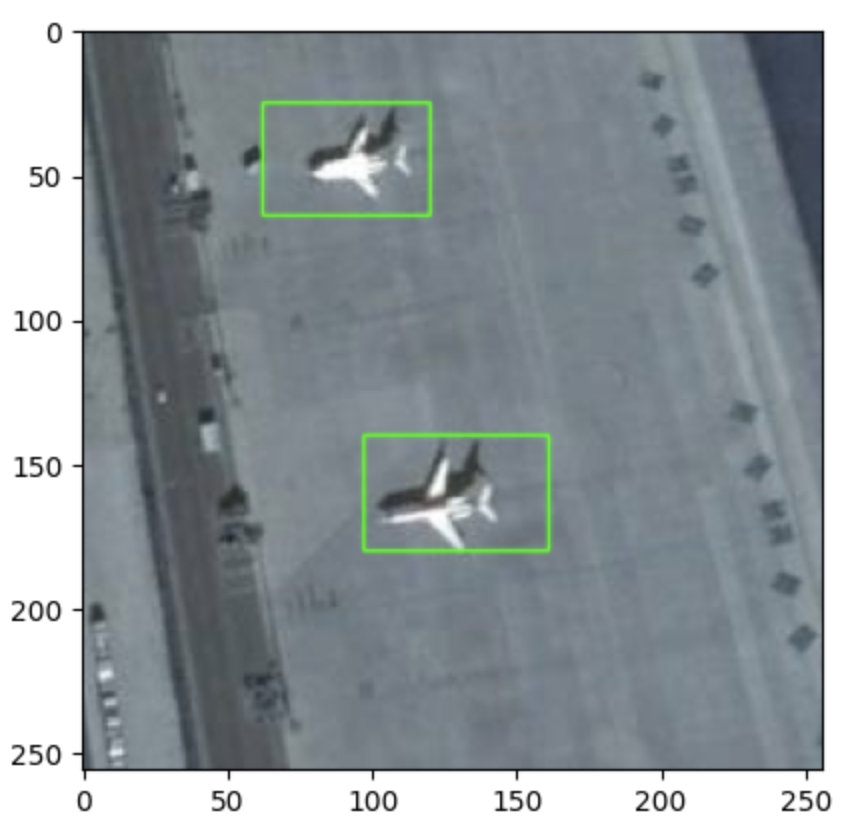

In [ ]:
#evaluating confusion matrix, precision, recall and F1
from sklearn.metrics import confusion_matrix
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true = train_labels
y_pred = predictions
confusion_matrix(y_true, y_pred, labels=["truth", "predictions"])
precision_recall_fscore_support(y_true, y_pred, average='weighted')

**Question - 5**- Improvements, Extensions and Challenges

**Improvements** -



Data  Augmentation



Transfer Learning(resnet vs vgg)

Batch Normalization - make NN faster by adding more layers. A typical neural network is trained using a collected set of input data called batch. The new layer performs the standardizing and normalizing operations on the input of a layer coming from a previous layer. Similarly, the normalizing process in batch normalization takes place in batches, not as a single input.

Droupout Rates - freezing of few nodes(learning implementation)

**Challenges**


  1. Occlusions handling - Image segmentation
     portions of samples may go out of computer vision.  The image segmentation techniques generate a pixel-wise mask for each object by assigning a category label to each pixel in the image, resulting in more accurate predictions of an object's location even in the case of occlusions.Create an area of bounding box (interval) vs number in that interval histogram -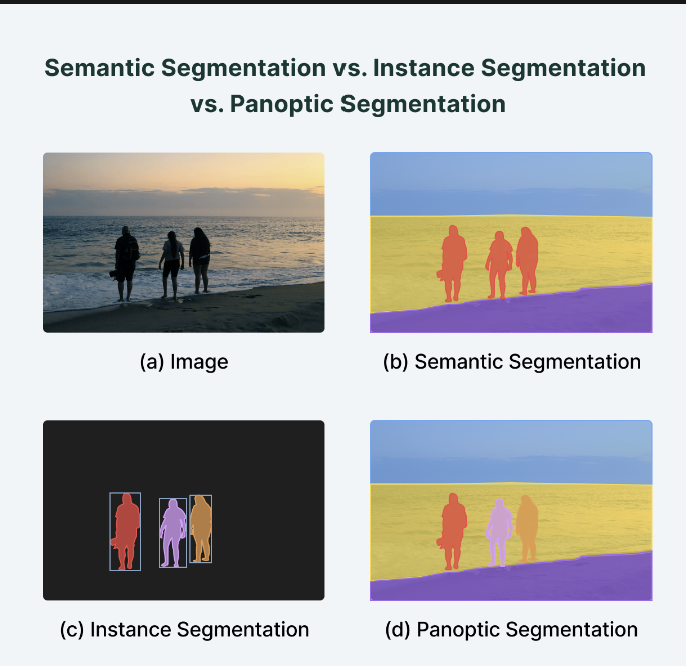
    
  2. Small scale objects -
          Increasing model's input resolution
          Tiling images
          Generating more data via augmentation
          Auto learning model anchors
          Filtering out extraneous classes
      







Extensions - Occlusion handling using Mask RCNN:


Resources used -


1. Kaggle projects - cat vs dog
2. Medium - articles
3. Handwritten Digits tutorial - codebasics
4. Towards Data Science - articles
5. scikitlearn documentation
6. keras, pandas and numpy documentation
7. python documentation
8. IBM articles





